# TP 1

In [139]:
!pip install pandas
!pip install seaborn

## Imports + configuración

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("classic")
%matplotlib inline
sns.set(rc={"figure.figsize": (25, 8)})

## Leer dataset

In [141]:
df = pd.read_csv("datos_incendios.csv")

In [142]:
df.head()

año     provincia  total_incendios  incendio_neglgencia  \
0  1993  Buenos Aires                0                    0   
1  1993     Catamarca                0                    0   
2  1993         Chaco                0                    0   
3  1993        Chubut               21                   18   
4  1993       Córdoba              151                    0   

   incendio_intencional  incendio_natural  incendio_desconocida  
0                     0                 0                     0  
1                     0                 0                     0  
2                     0                 0                     0  
3                     0                 0                     3  
4                     0                 0                   151

In [143]:
df.dtypes

año                      int64
provincia               object
total_incendios          int64
incendio_neglgencia      int64
incendio_intencional     int64
incendio_natural         int64
incendio_desconocida     int64
dtype: object

## Exploración

### Provincias

In [144]:
df_agg = df.groupby(by=["provincia"]).total_incendios.sum().reset_index()
df_agg.sort_values(by=["total_incendios"], ascending=False)

provincia  total_incendios
0                      Buenos Aires            77847
16                        Río Negro            32181
21                         Santa Fe            22702
17                            Salta            17446
2                             Chaco             8860
6                           Córdoba             8797
13                         Misiones             6992
18                         San Juan             6701
7                        Entre Ríos             5230
3                            Chubut             3757
1                         Catamarca             3468
14                          Neuquén             3459
9                             Jujuy             3405
5                        Corrientes             3353
25                          Tucumán             3033
12                          Mendoza             2717
11                         La Rioja             1891
10                         La Pampa             1676
8                           Formosa             1630
23              Santiago del Estero             1516
19                         San Luis             1135
24                 Tierra del Fuego              593
20                       Santa Cruz              515
22                         Santa Fé              442
15               Parques Nacionales               83
4   Ciudad Autónoma de Buenos Aires               60

In [145]:
sorted(df.provincia.unique())

['Buenos Aires',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Ciudad Autónoma de Buenos Aires',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Parques Nacionales',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santa Fé',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

Fix de provincia 'Santa Fé'

In [146]:
df.loc[df.provincia == "Santa Fé", "provincia"] = "Santa Fe"

In [147]:
df_agg = df.groupby(by=["provincia"]).total_incendios.sum().reset_index()
df_agg.sort_values(by=["total_incendios"], ascending=False).head(5)

provincia  total_incendios
0   Buenos Aires            77847
16     Río Negro            32181
21      Santa Fe            23144
17         Salta            17446
2          Chaco             8860

In [148]:
top_provincias = (
    df_agg.sort_values(by=["total_incendios"], ascending=False)
    .provincia.head(5)
    .to_list()
)
top_provincias

['Buenos Aires', 'Río Negro', 'Santa Fe', 'Salta', 'Chaco']

## Años

In [149]:
df_agg = df.groupby(by=["año"]).total_incendios.mean().reset_index()

<AxesSubplot:xlabel='año'>

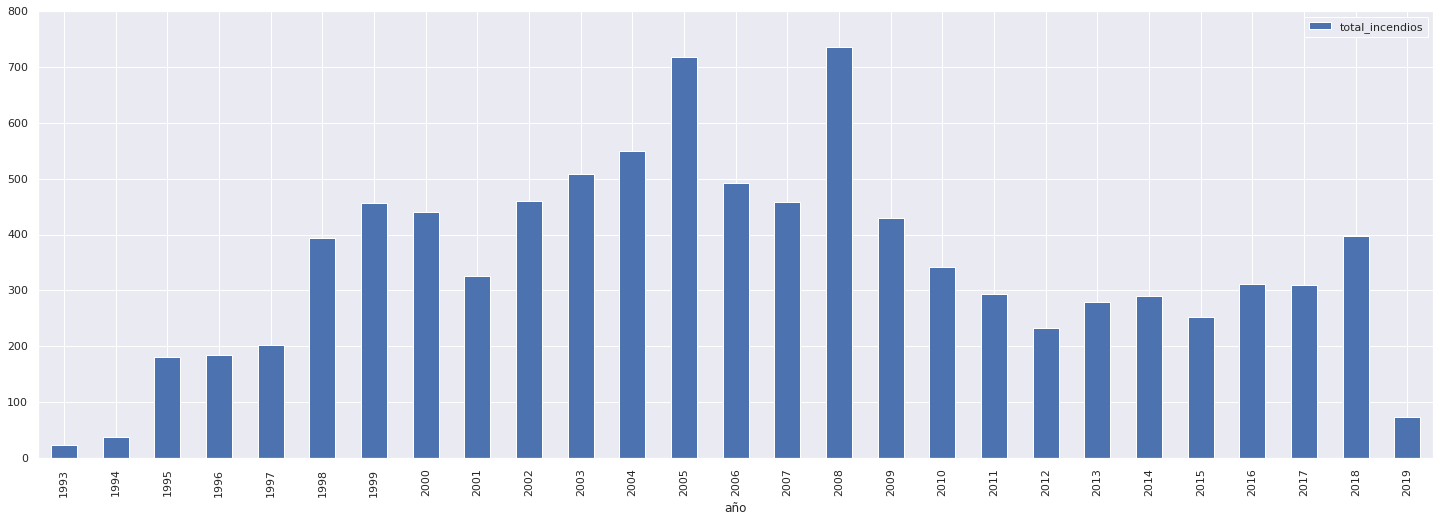

In [150]:
df_agg.plot.bar(x="año", y="total_incendios")

In [151]:
df_agg["total_incendios"].rolling(window=5).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4     125.533992
5     199.773913
6     283.556522
7     335.504710
8     363.947892
9     415.304414
10    437.977899
11    456.603986
12    512.445652
13    545.564130
14    545.302536
15    591.060870
16    567.151812
17    491.536660
18    451.684486
19    406.726153
20    315.076153
21    287.092819
22    269.249638
23    272.975000
24    288.100000
25    311.843478
26    268.543478
Name: total_incendios, dtype: float64

Recorto mi universo a 2000-2018. Porque parecen los años con mayor completitud

In [152]:
df = df[(df["año"] >= 2000) & (df["año"] <= 2018)]

In [153]:
df_agg = df.groupby(by=["año"]).total_incendios.mean().reset_index()

## Proporcion de los incendios por incidencia 

In [154]:
df_prop = df.copy()
df_prop["incendio_intencional"] = (df["incendio_intencional"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df["incendio_desconocida"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df["incendio_neglgencia"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_natural"] = (df["incendio_natural"] * 100) / df["total_incendios"]

In [155]:
df_prop.head(5)

año                        provincia  total_incendios  \
159  2000                     Buenos Aires             3503   
160  2000                        Catamarca               15   
161  2000                            Chaco              664   
162  2000                           Chubut              104   
163  2000  Ciudad Autónoma de Buenos Aires                1   

     incendio_neglgencia  incendio_intencional  incendio_natural  \
159            25.549529              6.822723          5.366828   
160            40.000000             60.000000          0.000000   
161             6.325301             82.680723          0.301205   
162            45.192308             30.769231          0.961538   
163             0.000000            100.000000          0.000000   

     incendio_desconocida  
159             62.260919  
160              0.000000  
161             10.692771  
162             23.076923  
163              0.000000

In [156]:
df_prop.loc[:, ~df.columns.isin(["provincia", "total_incendios"])].groupby(
    by=["año"]
).mean().plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='año'>

In [157]:
df_prop = df.loc[:, ~df.columns.isin(["provincia"])].groupby(by=["año"]).sum().copy()

df_prop["incendio_intencional"] = (df_prop["incendio_intencional"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df_prop["incendio_desconocida"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df_prop["incendio_neglgencia"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_natural"] = (df_prop["incendio_natural"] * 100) / df_prop[
    "total_incendios"
]

In [158]:
df_prop.head(5)

total_incendios  incendio_neglgencia  incendio_intencional  \
año                                                                
2000            10559            33.327020             20.229188   
2001             7839            30.871285             16.047965   
2002            10566            26.537952             12.057543   
2003            12191            28.488229             17.102781   
2004            12629            25.766094             11.655713   

      incendio_natural  incendio_desconocida  
año                                           
2000          6.904063             39.539729  
2001          8.317387             44.763363  
2002          7.438955             53.965550  
2003          6.644246             47.764744  
2004          4.386729             58.191464

<AxesSubplot:xlabel='año'>

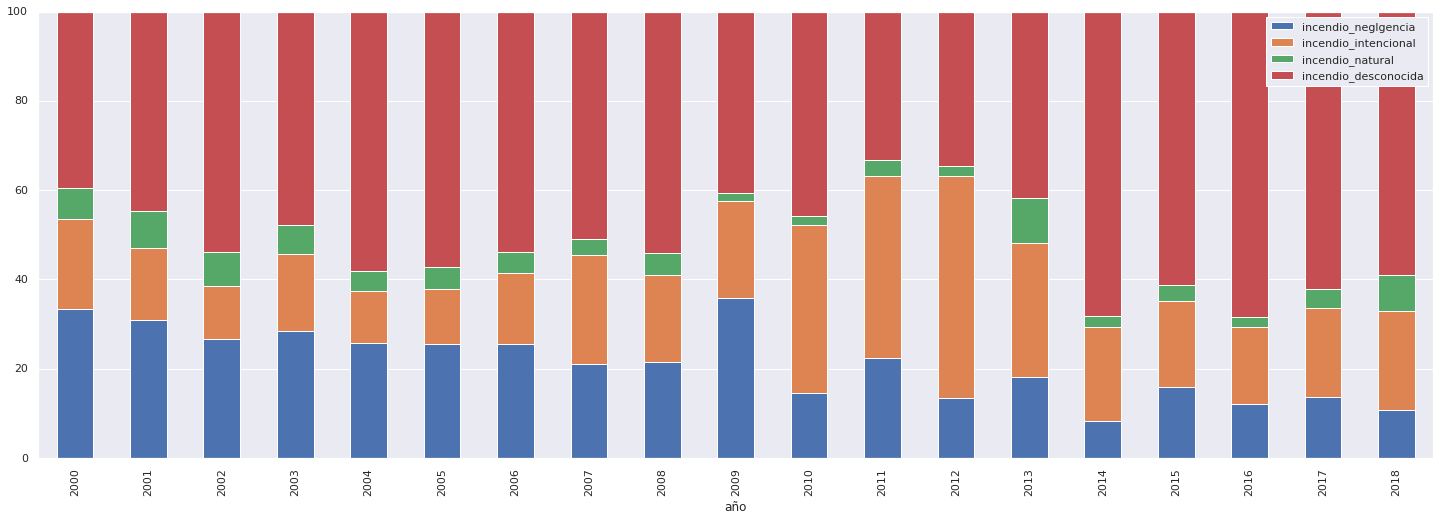

In [159]:
df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])].plot(
    kind="bar", stacked=True
)

## Gráficas

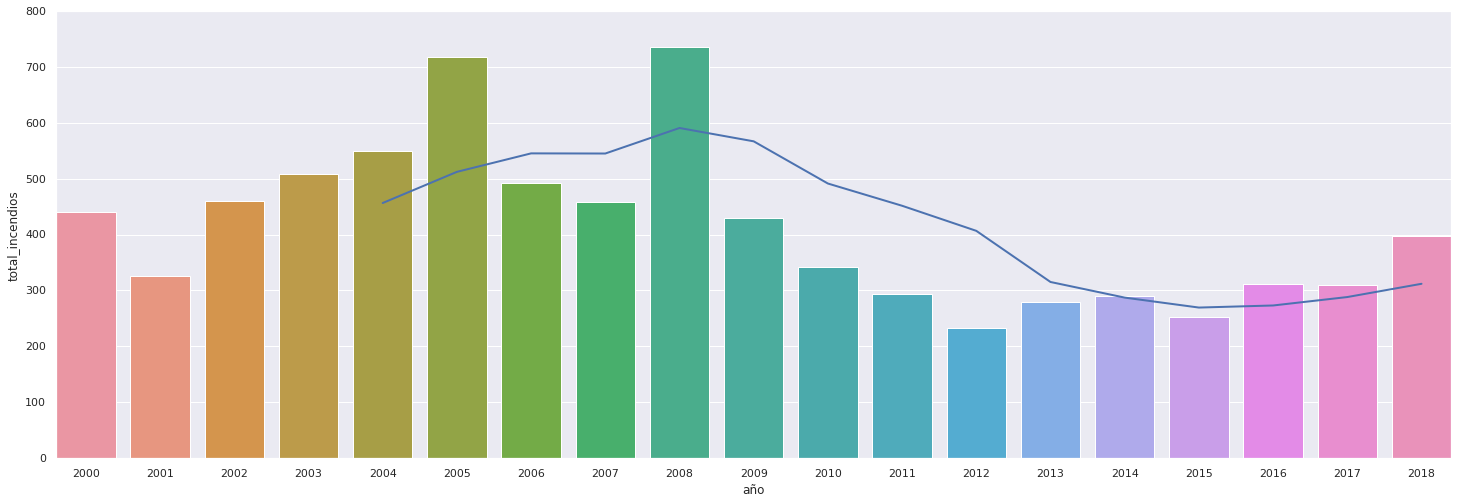

In [160]:
sns.barplot(x="año", y="total_incendios", data=df_agg)
plt.plot(df_agg["total_incendios"].rolling(window=5).mean(), linewidth=2)

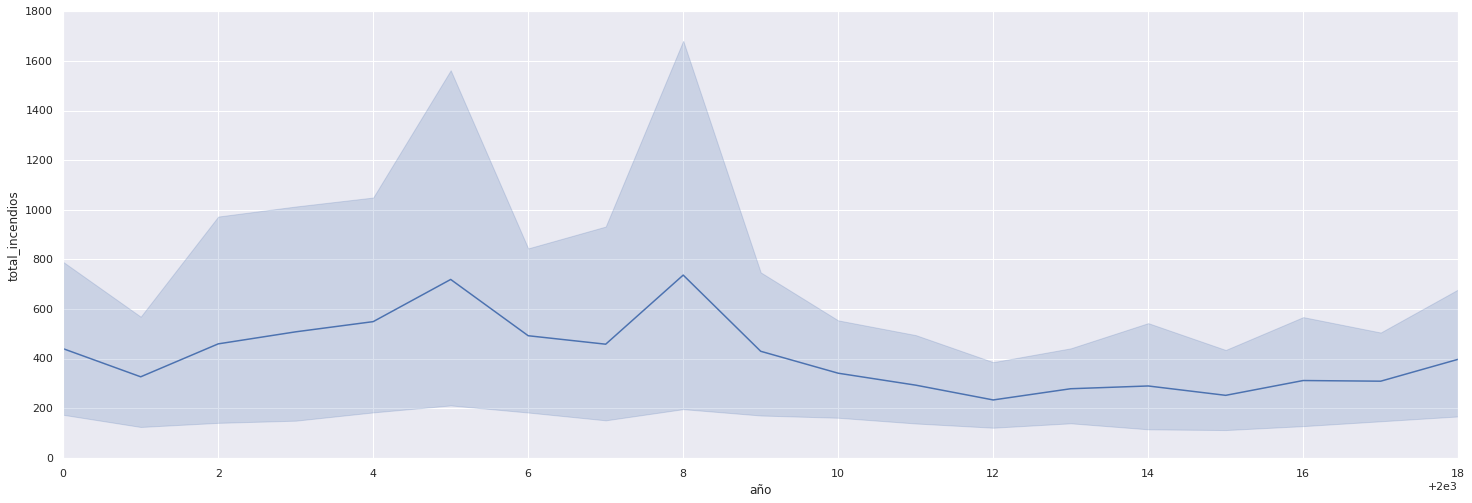

In [161]:
x = sns.lineplot(data=df, x="año", y="total_incendios")  # , hue='provincia')

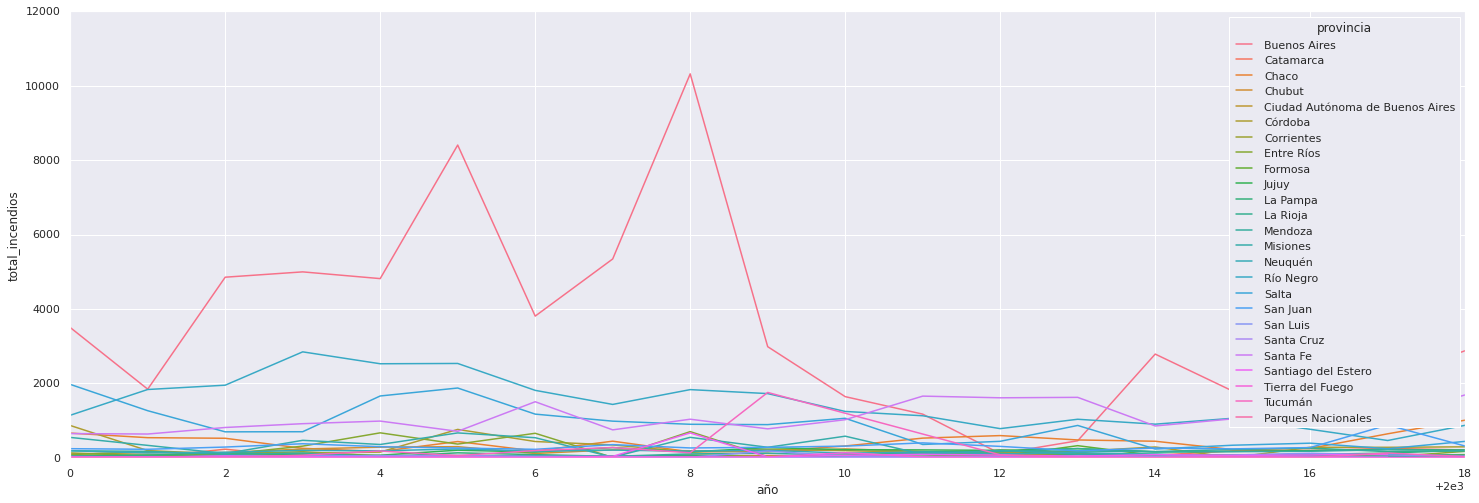

In [162]:
sns.set(rc={"figure.figsize": (25, 8)})
x = sns.lineplot(data=df, x="año", y="total_incendios", hue="provincia")

In [163]:
df.loc[df["provincia"].isin(top_provincias)]

año     provincia  total_incendios  incendio_neglgencia  \
159  2000  Buenos Aires             3503                  895   
161  2000         Chaco              664                   42   
174  2000     Río Negro             1143                  741   
175  2000         Salta             1974                  580   
179  2000      Santa Fe              651                  266   
..    ...           ...              ...                  ...   
585  2018  Buenos Aires             2879                   84   
587  2018         Chaco             1012                  126   
601  2018     Río Negro              874                   65   
602  2018         Salta              442                    0   
605  2018      Santa Fe             1691                  308   

     incendio_intencional  incendio_natural  incendio_desconocida  
159                   239               188                  2181  
161                   549                 2                    71  
174                   144                24                   234  
175                   175               294                   925  
179                   154               128                   103  
..                    ...               ...                   ...  
585                    39                61                  2695  
587                    33                 1                   852  
601                   284                 0                   525  
602                     0               441                     1  
605                  1131                 2                   250  

[95 rows x 7 columns]

In [164]:
x = sns.lineplot(
    data=df.loc[df["provincia"].isin(top_provincias)],
    x="año",
    y="total_incendios",
    hue="provincia",
)

<AxesSubplot:xlabel='año'>

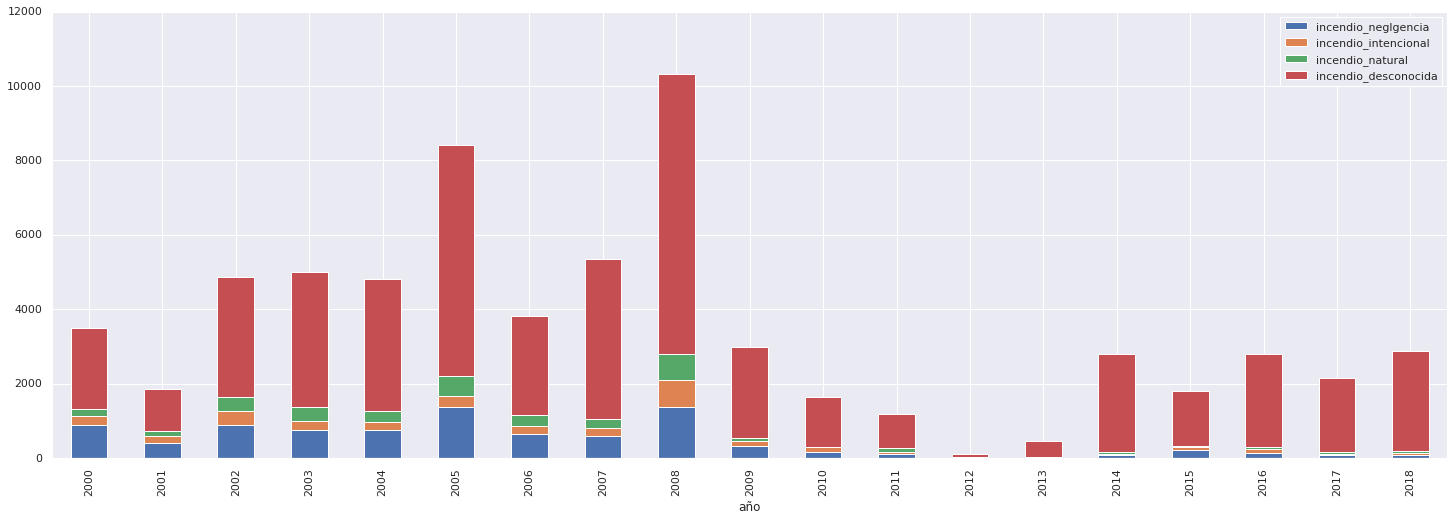

In [165]:
# df_subset = df.loc[df['provincia'].isin(top_provincias)]
# df_subset = df.loc[df['provincia']=='Buenos Aires', ]
df_subset = df.loc[
    df["provincia"] == "Buenos Aires", ~df.columns.isin(["total_incendios"])
]
df_subset.set_index("año").plot(kind="bar", stacked=True)

In [166]:
df_subset = df.loc[
    df["provincia"] == "Buenos Aires", ~df.columns.isin(["total_incendios"])
]

<AxesSubplot:xlabel='año'>

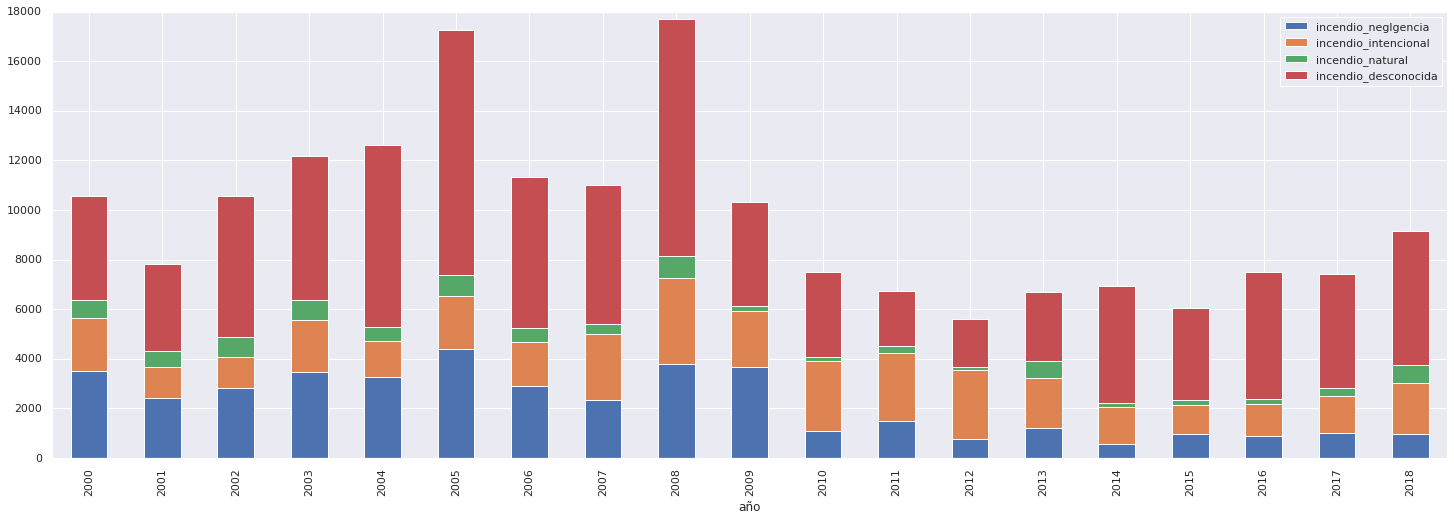

In [167]:
df.loc[:, ~df.columns.isin(["provincia", "total_incendios"])].groupby(
    by=["año"]
).sum().plot(kind="bar", stacked=True)

### Santa fe 

In [168]:
x = sns.lineplot(
    data=df.loc[df["provincia"] == "Santa Fe"],
    x="año",
    y="total_incendios",
    hue="provincia",
)

<AxesSubplot:xlabel='año'>

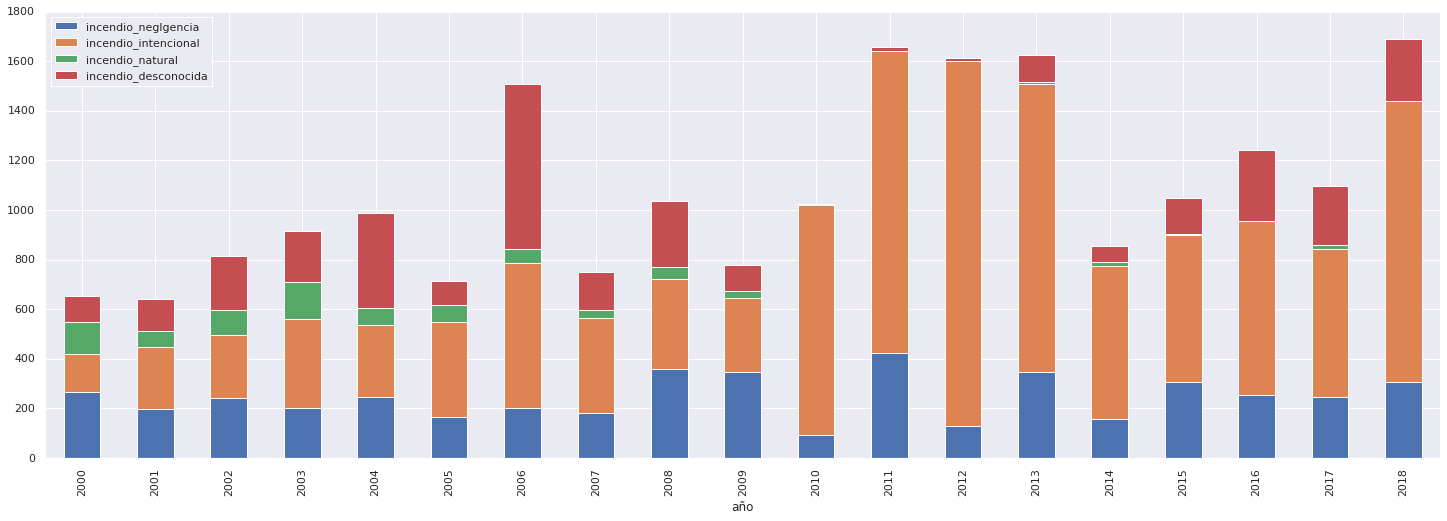

In [169]:
df_subset = df.loc[df["provincia"] == "Santa Fe", ~df.columns.isin(["total_incendios"])]
df_subset.set_index("año").plot(kind="bar", stacked=True)

Ordenar las columnas en las gráficas

In [170]:
cols = df.columns.tolist()
cols

['año',
 'provincia',
 'total_incendios',
 'incendio_neglgencia',
 'incendio_intencional',
 'incendio_natural',
 'incendio_desconocida']

In [171]:
cols = [
    "año",
    "provincia",
    "incendio_intencional",
    "incendio_desconocida",
    "incendio_neglgencia",
    "incendio_natural",
    # 'total_incendios',
]

In [174]:
df[cols]

año                        provincia  incendio_intencional  \
159  2000                     Buenos Aires                   239   
160  2000                        Catamarca                     9   
161  2000                            Chaco                   549   
162  2000                           Chubut                    32   
163  2000  Ciudad Autónoma de Buenos Aires                     1   
..    ...                              ...                   ...   
603  2018                         San Juan                   211   
604  2018                         San Luis                     0   
605  2018                         Santa Fe                  1131   
606  2018                 Tierra del Fuego                     4   
607  2018                          Tucumán                    29   

     incendio_desconocida  incendio_neglgencia  incendio_natural  
159                  2181                  895               188  
160                     0                    6                 0  
161                    71                   42                 2  
162                    24                   47                 1  
163                     0                    0                 0  
..                    ...                  ...               ...  
603                     0                  104                 0  
604                    12                    0                27  
605                   250                  308                 2  
606                     3                    9                 0  
607                     0                    0                 4  

[449 rows x 6 columns]

<AxesSubplot:xlabel='año'>

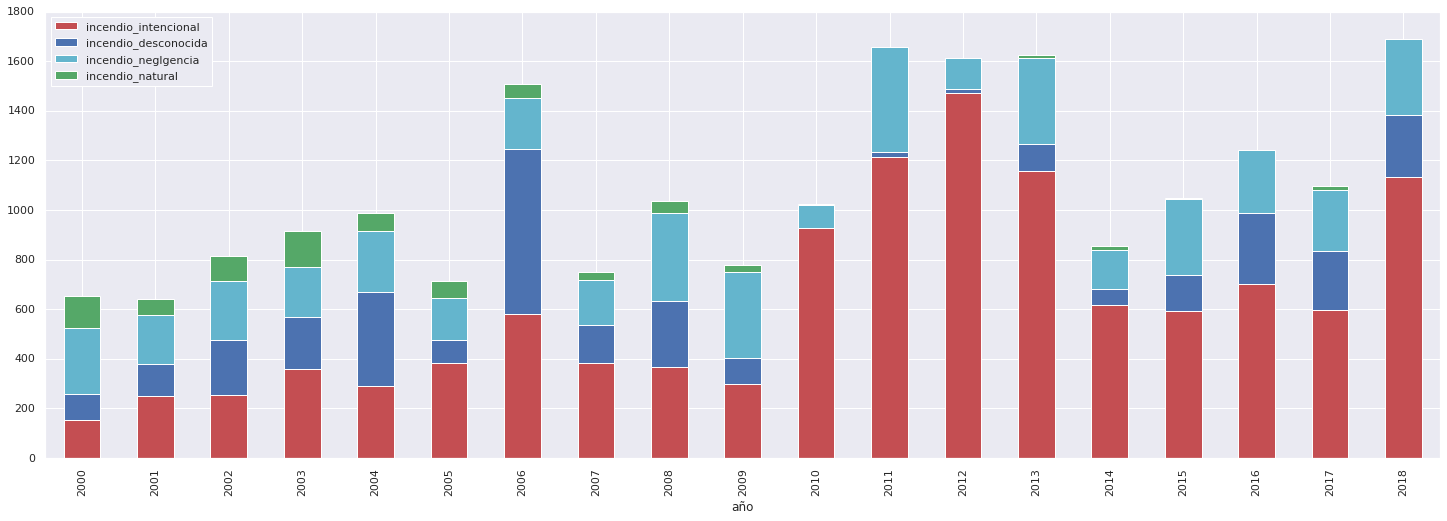

In [175]:
df_subset = df.loc[df["provincia"] == "Santa Fe", cols]
df_subset.set_index("año").plot(kind="bar", stacked=True, color=["r", "b", "c", "g"])

In [176]:
cols = [
    "año",
    "provincia",
    "incendio_intencional",
    "incendio_desconocida",
    "incendio_neglgencia",
    "incendio_natural",
    "total_incendios",
]

In [177]:
df_prop = df.loc[df["provincia"] == "Santa Fe", cols].copy()

df_prop["incendio_intencional"] = (df_prop["incendio_intencional"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df_prop["incendio_desconocida"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df_prop["incendio_neglgencia"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_natural"] = (df_prop["incendio_natural"] * 100) / df_prop[
    "total_incendios"
]

In [178]:
df_prop.head(5)

año provincia  incendio_intencional  incendio_desconocida  \
179  2000  Santa Fe             23.655914             15.821813   
203  2001  Santa Fe             39.123631             20.187793   
226  2002  Santa Fe             31.288344             26.871166   
250  2003  Santa Fe             39.149400             22.791712   
273  2004  Santa Fe             29.381966             38.601824   

     incendio_neglgencia  incendio_natural  total_incendios  
179            40.860215         19.662058              651  
203            30.829421          9.859155              639  
226            29.447853         12.392638              815  
250            21.919302         16.139586              917  
273            24.822695          7.193516              987

In [179]:
df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])].set_index("año").plot(
    kind="bar", stacked=True, color=["r", "b", "c", "g"]
)

<AxesSubplot:xlabel='año'>

<AxesSubplot:xlabel='año'>

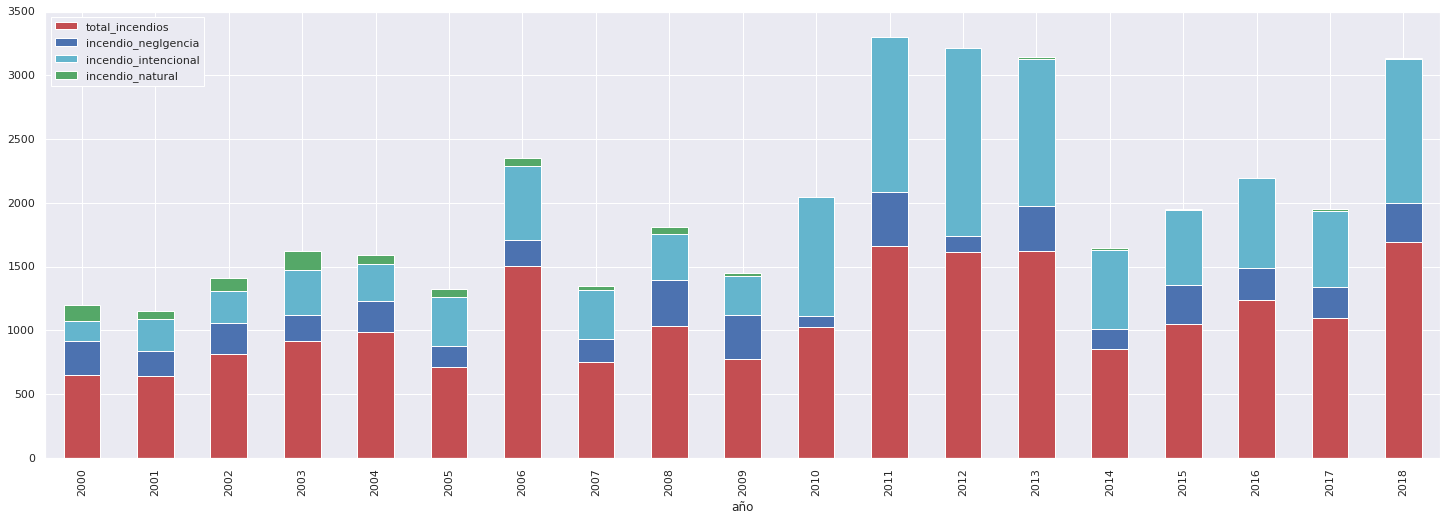

In [180]:
df_subset = df.loc[
    df["provincia"] == "Santa Fe", ~df_prop.columns.isin(["total_incendios"])
]
df_subset.set_index("año").plot(kind="bar", stacked=True, color=["r", "b", "c", "g"])

In [181]:
for i in zip(df_prop["año"], df_prop["incendio_intencional"]):
    print(i)

(2000, 23.655913978494624)
(2001, 39.123630672926446)
(2002, 31.288343558282207)
(2003, 39.14940021810251)
(2004, 29.38196555217832)
(2005, 53.51123595505618)
(2006, 38.553417385534175)
(2007, 50.7323568575233)
(2008, 35.1976856316297)
(2009, 38.43187660668381)
(2010, 90.4296875)
(2011, 73.22074788902292)
(2012, 91.25852448853068)
(2013, 71.26153846153846)
(2014, 72.07943925233644)
(2015, 56.5425023877746)
(2016, 56.56728444802579)
(2017, 54.37956204379562)
(2018, 66.88350088704908)


In [259]:
import matplotlib as mpl


def autolabel(bar_label):
    # print(rects)
    # for idx,rect in enumerate(rects):

    # print(rects.get_children())
    bars = [
        rect
        for rect in bar_plot.get_children()
        if isinstance(rect, mpl.patches.Rectangle)
    ]
    # print(f"len bars: {len(bars)}")

    for idx, rect in enumerate(bars):
        height = rect.get_height()
        if idx < 20 and idx < len(bar_label) and bar_label[idx] > 0:
            # idx % 4 == 0 and i < len(bar_label) - 1 and
            # print(f"idx: {idx}, rect:{rect}, bar_label[i]: {bar_label[i]}")
            # print(f"idx: {idx}, rect:{rect}, idx: {idx}, bar_label[idx]: {bar_label[idx]}")
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                0.5 * height,
                bar_label[idx],
                fontsize="medium",
                ha="center",
                va="center",
                rotation=0,
            )

In [194]:
# bar_plot.get_children()
df_prop["incendio_intencional"].astype("int64").to_list()

[0, 22, 10, 29, 18, 20, 25, 0, 31, 0, 13, 10, 47, 18, 50, 11, 0, 0, 12]

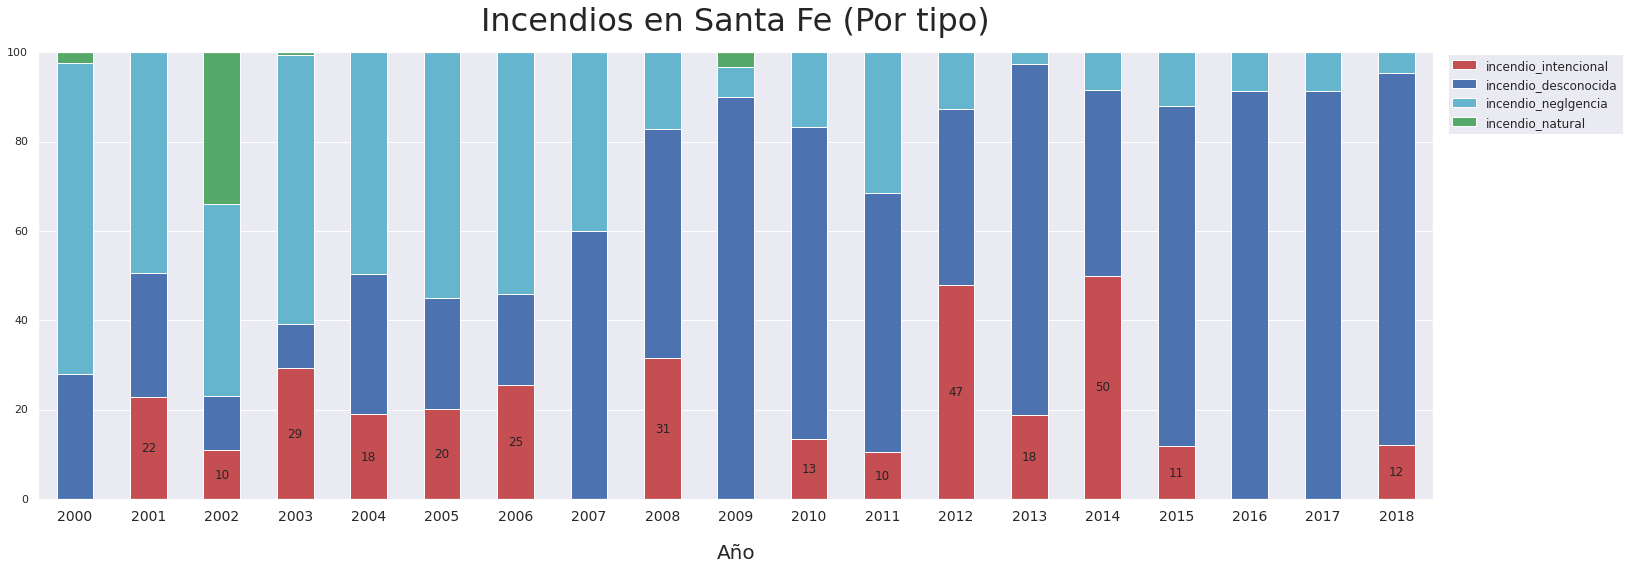

In [322]:
# TODO: Fix, se colgó
fig, ax = plt.subplots(nrows=1, ncols=1)

# print(ax)
# bar_plot = (
(
    df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])]
    .set_index("año")
    .plot(kind="bar", stacked=True, color=["r", "b", "c", "g"], ax=ax)
)

autolabel(bar_label=df_prop["incendio_intencional"].astype("int64").to_list())

# Add Title and Labels
plt.title("Incendios en Santa Fe (Por tipo)", fontsize=32, pad=22)
plt.xlabel("Año", fontsize=20, labelpad=20)
plt.xticks(fontsize=14, rotation=0)
plt.legend(bbox_to_anchor=(1.06, 1.0,.08,.01), loc='upper right', fontsize=12)

# plt.legend(loc='lower right')
# plt.legend(loc='best')

# plt.ylabel("Porcentaje", fontsize=20)
plt.show()

### Entre rios

In [185]:
df_prop = df.loc[df["provincia"] == "Entre Ríos", cols].copy()

df_prop["incendio_intencional"] = (df_prop["incendio_intencional"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df_prop["incendio_desconocida"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df_prop["incendio_neglgencia"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_natural"] = (df_prop["incendio_natural"] * 100) / df_prop[
    "total_incendios"
]

In [186]:
df_prop.head(5)

año   provincia  incendio_intencional  incendio_desconocida  \
166  2000  Entre Ríos              0.000000             27.906977   
190  2001  Entre Ríos             22.839506             27.777778   
213  2002  Entre Ríos             10.989011             12.087912   
237  2003  Entre Ríos             29.299363              9.872611   
261  2004  Entre Ríos             18.926975             31.445604   

     incendio_neglgencia  incendio_natural  total_incendios  
166            69.767442          2.325581               86  
190            49.382716          0.000000              162  
213            42.857143         34.065934               91  
237            60.191083          0.636943              314  
261            49.627422          0.000000              671

<AxesSubplot:xlabel='año'>

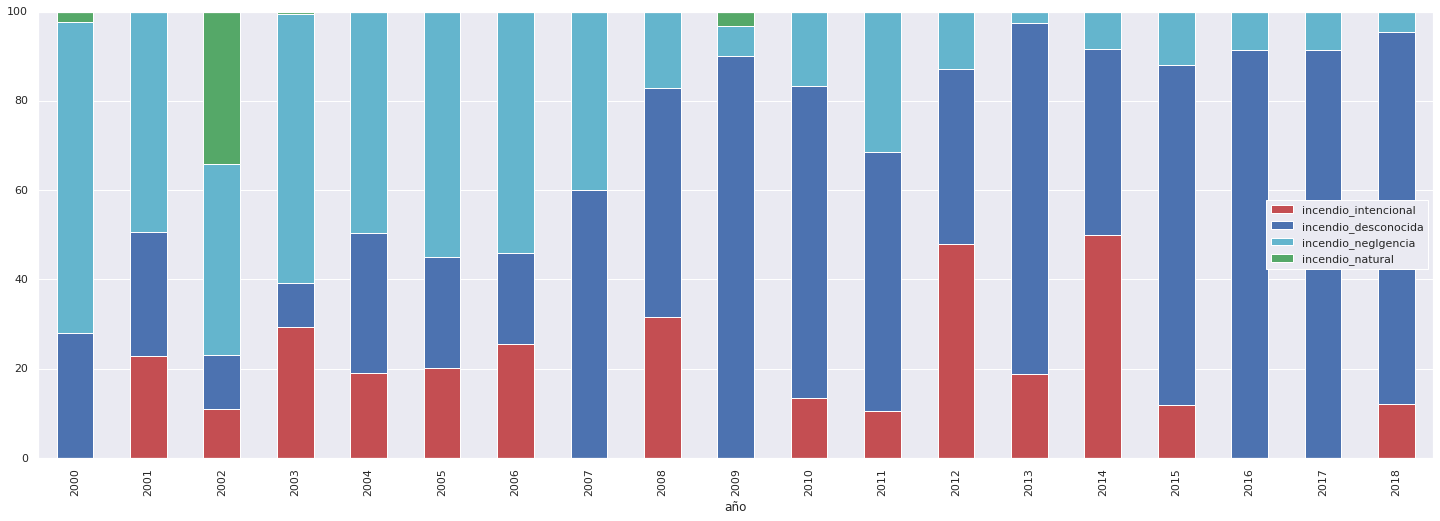

In [187]:
df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])].set_index("año").plot(
    kind="bar", stacked=True, color=["r", "b", "c", "g"]
)

<AxesSubplot:xlabel='año'>

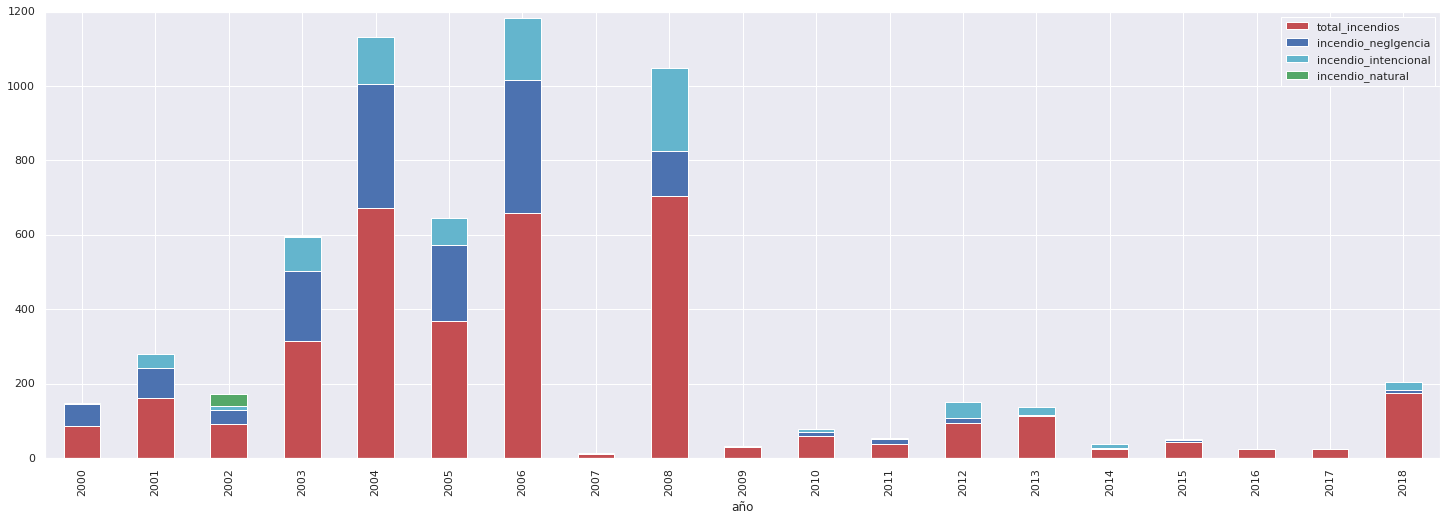

In [188]:
df_subset = df.loc[
    df["provincia"] == "Entre Ríos", ~df_prop.columns.isin(["total_incendios"])
]
df_subset.set_index("año").plot(kind="bar", stacked=True, color=["r", "b", "c", "g"])